In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import matplotlib.pyplot as plt
from mpmath import chebyfit, sin, cos, pi, nprint, polyval
from functools import partial

In [2]:
"""
def fit(func=sin, bits=16, degree=5, scale_left=0.99):
    def scaled_func(x, scale):
        return (
            (scale * (2**(bits - 1)) * func((pi / (2 ** (bits - 1))) * x)) +
            ((1 - scale) / 2)
        )
    poly = chebyfit(partial(scaled_func, scale=1), [0, 2**(bits - 2)], degree)
    nprint(poly)
"""


def fit(func=sin, bits=27, degree=5, scale_left=0.99):
    def scaled_func(x, scale):
        return (
            (scale * (2**(bits - 1)) * func(2 * pi * x)) +
            (2**(bits-1) * (1 - scale) / 2)
        )
    poly = chebyfit(partial(scaled_func, scale=1), [0, 1/4], degree)
    return poly

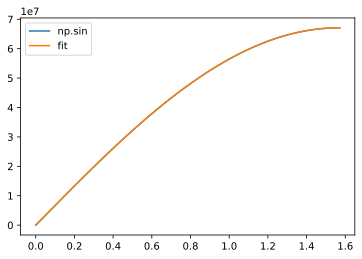

In [3]:
range = np.linspace(0, np.pi / 2, 200)
poly = fit()
plt.plot(range, 2**26 * np.sin(range), label='np.sin')
plt.plot(range, [polyval(poly, x / (2 * pi)) for x in range], label='fit')
plt.legend()
plt.show()

In [4]:
for coef in poly:
    print('%08x' % int(coef))

b301d445
-c9fe3f11
03271d02
19093615
00001f98


In [6]:
out = """0.0000  0.000002
0.0156  0.001530
0.0312  0.003047
0.0469  0.004535
0.0625  0.005980
0.0781  0.007367
0.0938  0.008682
0.1094  0.009913
0.1250  0.011049
0.1406  0.012077
0.1562  0.012990
0.1719  0.013779
0.1875  0.014435
0.2031  0.014953
0.2188  0.015326
0.2344  0.015551"""
x = [float(line.strip().split()[0]) for line in out.split('\n')]
y = [float(line.strip().split()[1]) for line in out.split('\n')]

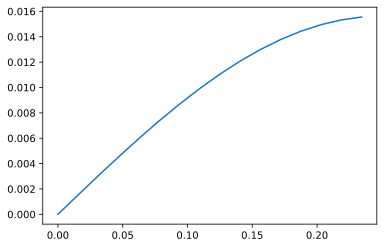

In [7]:
plt.plot(x, y)